<a href="https://githubtocolab.com/emiletimothy/Caltech-CS155-2023/blob/main/set2/set2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

Loading the text files in.

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training1.txt', 'wine_training1.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_training2.txt', 'wine_training2.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set2/data/wine_validation.txt', 'wine_validation.txt')

('wine_validation.txt', <http.client.HTTPMessage at 0x7fb435bc67c0>)

The following function may be useful for loading the necessary data.

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: given as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [ ]:
data_1 = load_data('wine_training1.txt')

# split data into x1...x9 and y
# for i in range(len(data)):
X_1 = data_1[:, 1:]
y_1 = data_1[:, 0]

std_1 = np.std(X_1, axis = 0)
mean_1 = np.mean(X_1, axis = 0)

normal_X_list_1 = []
for i in range(len(data_1)):
  normal_X_1 = [1]
  for j in range(13):
    normal_X_1.append((X_1[i][j] - mean_1[j]) / std_1[j])
  normal_X_list_1.append(normal_X_1)

X_1 = np.array(normal_X_list_1)

In [ ]:
data_2 = load_data('wine_training2.txt')

# split data into x1...x9 and y
# for i in range(len(data)):
X_2 = data_2[:, 1:]
y_2 = data_2[:, 0]

std_2 = np.std(X_2, axis = 0)
mean_2 = np.mean(X_2, axis = 0)

normal_X_list_2 = []
for i in range(len(data_2)):
  normal_X_2 = [1]
  for j in range(13):
    normal_X_2.append((X_2[i][j] - mean_2[j]) / std_2[j])
  normal_X_list_2.append(normal_X_2)

X_2 = np.array(normal_X_list_2)

In [ ]:
data_val_1 = load_data('wine_validation.txt')

# split data into x1...x9 and y
# for i in range(len(data)):
X_val_1 = data_val_1[:, 1:]
y_val_1 = data_val_1[:, 0]



std_val_1  = np.std(data_1[:, 1:], axis = 0)
mean_val_1 = np.mean(data_1[:, 1:], axis = 0)

normal_X_list_val_1 = []
for i in range(len(data_val_1)):
  normal_X_val_1 = [1]
  for j in range(13):
    normal_X_val_1.append((X_val_1[i][j] - mean_val_1[j]) / std_val_1[j])
  normal_X_list_val_1.append(normal_X_val_1)

X_val_1 = np.array(normal_X_list_val_1)

In [ ]:
data_val_2 = load_data('wine_validation.txt')

# split data into x1...x9 and y
# for i in range(len(data)):
X_val_2 = data_val_2[:, 1:]
y_val_2 = data_val_2[:, 0]

std_val_2  = np.std(data_2[:, 1:], axis = 0)
mean_val_2 = np.mean(data_2[:, 1:], axis = 0)

normal_X_list_val_2 = []
for i in range(len(data_val_2)):
  normal_X_val_2 = [1]
  for j in range(13):
    normal_X_val_2.append((X_val_2[i][j] - mean_val_2[j]) / std_val_2[j])
  normal_X_list_val_2.append(normal_X_val_2)

X_val_2 = np.array(normal_X_list_val_2)

In [ ]:
#SGD Implementation

def loss(X, Y, w):
    '''
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    err = 0
    for i in range(len(X)):
      err += (np.log( 1 / (1 + np.exp(-(Y[i] * np.dot(np.transpose(w), X[i]))))))
    return -err/len(X)


def gradient(x, y, w, l, N):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to w.
    '''

    #==============================================
    # TODO: Implement the gradient of the
    # loss function.
    #==============================================
    # try:
    grad = - (y * x) / (1 + np.exp(y * np.dot(w, x)))
    reg = (2*w*l) / N

    return grad + reg

def SGD(X, Y, w_start, eta, N_epochs, l):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''

    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================


    w = np.copy(w_start)
    for i in range(N_epochs):
      random_data_idx = np.random.permutation(range(len(X)))
      for j in random_data_idx:
        w = w - eta * gradient(X[j], Y[j], w, l, len(X))
    return w

In [ ]:
from tqdm import tqdm

In [ ]:
eta = 5e-4

N_epochs = 20000
lambdas = [0.00001, 0.00005, 0.00025, 0.00125, 0.00625, 0.03125, 0.15625, 0.78125,
           3.90625, 19.53125, 97.65625, 488.28125, 2441.40625, 12207.03125, 61035.15625]

e_in_lst_1 = []
e_in_lst_2 = []

e_out_lst_1 = []
e_out_lst_2 = []

w_norm_1 = []
w_norm_2 = []

for l in tqdm(lambdas):
  w = np.random.randn(14) / 10
  w1 = SGD(X_1, y_1, w, eta, N_epochs, l)
  e_in_1 = loss(X_1, y_1, w1)
  e_out_1 = loss(X_val_1, y_val_1, w1)
  e_in_lst_1.append(e_in_1)
  e_out_lst_1.append(e_out_1)
  w_norm_1.append(np.linalg.norm(w1))

  w = np.random.randn(14) / 10
  w2 = SGD(X_2, y_2, w, eta, N_epochs, l)
  e_in_2 = loss(X_2, y_2, w2)
  e_out_2 = loss(X_val_2, y_val_2, w2)
  e_in_lst_2.append(e_in_2)
  e_out_lst_2.append(e_out_2)
  w_norm_2.append(np.linalg.norm(w2))

100%|██████████| 15/15 [11:33<00:00, 46.26s/it]


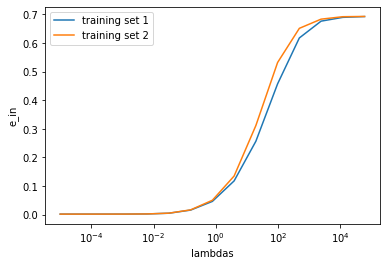

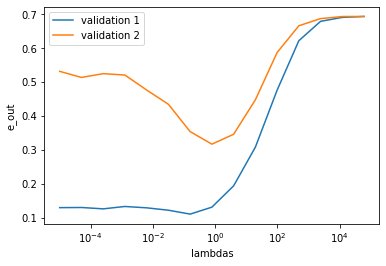

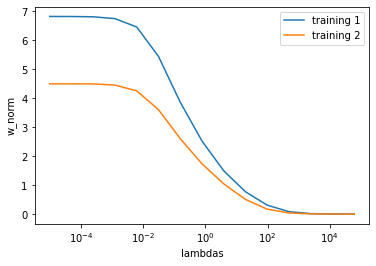

In [ ]:
plt.plot(lambdas, e_in_lst_1, label = "training set 1")
plt.plot(lambdas, e_in_lst_2, label = "training set 2")
plt.xlabel("lambdas")
plt.ylabel("e_in")
plt.xscale("log")
plt.legend()
plt.show()

plt.figure(1)
plt.plot(lambdas, e_out_lst_1, label = "validation 1")
plt.plot(lambdas, e_out_lst_2, label = "validation 2")
plt.xlabel("lambdas")
plt.ylabel("e_out")
plt.xscale("log")
plt.legend()
plt.show()

plt.figure(2)
plt.plot(lambdas, w_norm_1, label = "training 1")
plt.plot(lambdas, w_norm_2,label = "training 2")
plt.xlabel("lambdas")
plt.ylabel("w_norm")
plt.xscale("log")
plt.legend()
plt.show()

In [ ]:
print(X_1)

[[ 1.00000000e+00  1.51762786e+00 -3.86918125e-01 ... -5.82499016e-02
   2.14525874e+00  8.28253257e-01]
 [ 1.00000000e+00  3.88424150e-01 -3.10170410e-01 ... -1.29340764e-15
   9.43303623e-01  7.86503815e-01]
 [ 1.00000000e+00  3.44571579e-01  3.25739232e-01 ... -1.16499803e-01
   4.11669628e-01  1.16224879e+00]
 ...
 [ 1.00000000e+00 -1.15737899e+00  7.35681672e-02 ... -4.65999212e-01
  -1.27569044e+00 -8.38941114e-01]
 [ 1.00000000e+00 -5.21516704e-01 -4.74629800e-01 ... -9.31998425e-01
  -4.89796711e-01 -1.18406983e+00]
 [ 1.00000000e+00 -8.83300417e-01  2.45274734e+00 ... -1.51449744e+00
  -9.75201663e-01 -5.21645357e-01]]


In [ ]:
print(X_val_1[0])

[ 1.          0.22397701 -0.32113437 -0.91989488 -0.62600509  0.54540747
  1.00161233  0.75416696 -0.56034214  0.52461954  0.70194245 -0.99024833
  0.82773102  0.32725996]
